In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image
import matplotlib.pyplot as plt
#import torch_xla
#import torch_xla.core.xla_model as xm

In [ ]:
style_img_path = '/content/styleimg4.jpg'
input_img_path = '/content/content_image.jpg'

In [ ]:
#device = xm.xla_device()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class NST(nn.Module):
  def __init__(self):
    super().__init__()
    self.chosen_layers = [0, 5, 10, 19, 28]
    self.content_layers = [25]
    self.model = models.vgg19(pretrained=True).features
  def forward(self, x):
    res = []
    for layer in range(29):
      x = self.model[layer](x)
      if layer in self.chosen_layers:
        res.append(x)
    
    return res

In [ ]:
def gram(X):
    num_channels, n = X.shape[1], X.numel() // X.shape[1]
    X = X.view((num_channels, n))
    return torch.matmul(X, X.T) / (num_channels * n)

In [ ]:
transformer = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

In [ ]:
# Transforming images 
pil_input_img = Image.open(input_img_path)
input_img = transformer(pil_input_img).to(device)[:3, :, :]
# print(input_img)

pil_style_img = Image.open(style_img_path)
style_img = transformer(pil_style_img).to(device)[:3, :, :]
# print(style_img)

output_img = input_img.clone().requires_grad_(True).to(device)
# output_img = torch.randn(input_img.shape, device=device, requires_grad=True)

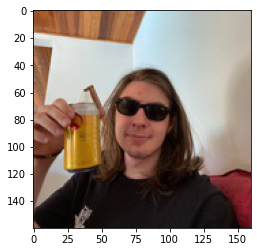

In [ ]:
plt.imshow(pil_input_img)

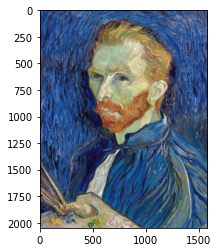

In [ ]:
plt.imshow(pil_style_img)

In [ ]:
epochs = 2000
lr = 1e-3
alpha = 1
beta = 1e-2
optimizer = optim.Adam([output_img], lr=lr)

In [ ]:
model = NST().to(device).eval()

In [ ]:
for epoch in range(epochs):
  print(f'In {epoch}, epoch')
  style_features = model(style_img)
  output_features = model(output_img)
  content_features = model(input_img)

  style_loss = content_loss = 0

  for style_feature, output_feature, content_feature in zip(style_features, output_features, content_features):
    content_loss += torch.mean((output_feature - content_feature) ** 2)

    channel, height, width = output_feature.shape

    G = output_feature.view(channel, height * width).mm(
        output_feature.view(channel, height * width).t()
    )
    A = style_feature.view(channel, height * width).mm(
        style_feature.view(channel, height * width).t()
    )

    style_loss += torch.mean((G - A) ** 2)

  loss = alpha * content_loss + beta * style_loss
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In 0, epoch
In 1, epoch
In 2, epoch
In 3, epoch
In 4, epoch
In 5, epoch
In 6, epoch
In 7, epoch
In 8, epoch
In 9, epoch
In 10, epoch
In 11, epoch
In 12, epoch
In 13, epoch
In 14, epoch
In 15, epoch
In 16, epoch
In 17, epoch
In 18, epoch
In 19, epoch
In 20, epoch
In 21, epoch
In 22, epoch
In 23, epoch
In 24, epoch
In 25, epoch
In 26, epoch
In 27, epoch
In 28, epoch
In 29, epoch
In 30, epoch
In 31, epoch
In 32, epoch
In 33, epoch
In 34, epoch
In 35, epoch
In 36, epoch
In 37, epoch
In 38, epoch
In 39, epoch
In 40, epoch
In 41, epoch
In 42, epoch
In 43, epoch
In 44, epoch
In 45, epoch
In 46, epoch
In 47, epoch
In 48, epoch
In 49, epoch
In 50, epoch
In 51, epoch
In 52, epoch
In 53, epoch
In 54, epoch
In 55, epoch
In 56, epoch
In 57, epoch
In 58, epoch
In 59, epoch
In 60, epoch
In 61, epoch
In 62, epoch
In 63, epoch
In 64, epoch
In 65, epoch
In 66, epoch
In 67, epoch
In 68, epoch
In 69, epoch
In 70, epoch
In 71, epoch
In 72, epoch
In 73, epoch
In 74, epoch
In 75, epoch
In 76, epoch
In 77, ep

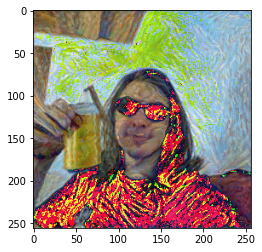

In [ ]:
pil_output_img = transforms.ToPILImage()(output_img)
plt.imshow(pil_output_img)